In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150, 150),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=128,
                                                              directory=validation_dir,
                                                              target_size=(150, 150),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)


In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

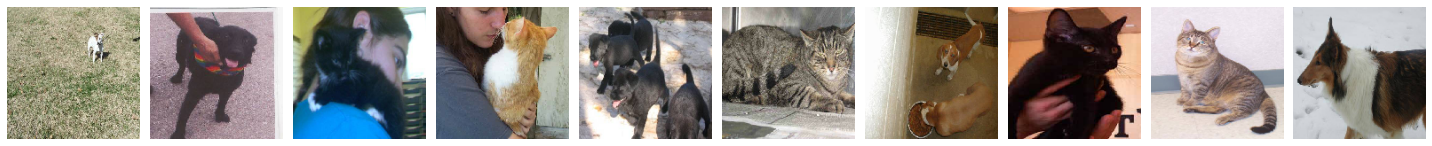

In [13]:
plotImages(sample_training_images[:10])

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // 128,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // 128
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 13s 669ms/step - loss: 0.9106 - accuracy: 0.5069 - val_loss: 0.6929 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 9s 631ms/step - loss: 0.6907 - accuracy: 0.5043 - val_loss: 0.6958 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 9s 635ms/step - loss: 0.6824 - accuracy: 0.5085 - val_loss: 0.6734 - val_accuracy: 0.5000
Epoch 4/15
15/15 [==============================] - 9s 633ms/step - loss: 0.6505 - accuracy: 0.5646 - val_loss: 0.6772 - val_accuracy: 0.5312
Epoch 5/15
15/15 [==============================] - 9s 632ms/step - loss: 0.6128 - accuracy: 0.6208 - val_loss: 0.6319 - val_accuracy: 0.6920
Epoch 6/15
15/15 [==============================] - 9s 631ms/step - loss: 0.5784 - accuracy: 0.6731 - val_loss: 0.6061 - val_accuracy: 0.6049
Epoch 7/15
15/15 [==============================] - 9s 628ms/step - loss: 0.5166 - accuracy: 0.7318 - val_loss: 0.5487 - val_accuracy: 0.6908
Epoch

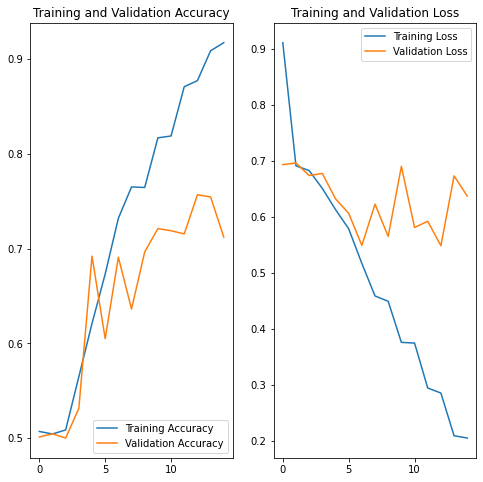

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### This is a clear case of overfitting of the training dataset. We infered this from the fact that the model is performing well on the training dataset but not on the validatin dataset. There are two ways to solve this probelm. The first way is to provide more diverse data and the second way is to build a more complex neural network which will detect more patterns in the data